# Walmart Sales Analysis (2010-2012)

We chose a dataset on 45 different US Walmart locations. Since the dataset includes datapoints on weekly fuel price, Consumer Price Index, and the unemployment rate in each Walmart's location, we determined it would make sense to analyze weekly sales as a whole + compared between stores (With special attention to the stores that performed the best and worst compared to the total average), and further search for correlations between sales and the aforementioned factors.

First, our imports, both libraries, and the data itself:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
walmart_df = pd.read_csv("Walmart.csv")
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')
walmart_df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price   
0         1 2010-02-05    1643690.90             0        42.31       2.572  \
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

To start with, let's look at the sales data as a whole (note: it's worth noting that sales are expressed in millions, with 0.5 being half a million, etc; fix later?):

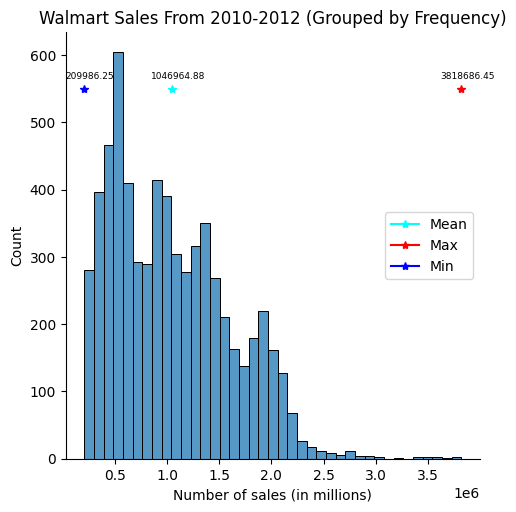

In [3]:
sns.displot(walmart_df, x="Weekly_Sales")

totalmean = round(walmart_df["Weekly_Sales"].mean(), 2)
totalmax = round(walmart_df["Weekly_Sales"].max(), 2)
totalmin = round(walmart_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 550, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 200000, 565, totalmean , fontdict={ 'size': 6.5})
plt.plot(totalmax, 550, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 200000, 565, totalmax, fontdict={ 'size': 6.5})
plt.plot(totalmin, 550, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 185000, 565, totalmin, fontdict={ 'size': 6.5})

plt.legend(loc='right')
plt.title("Walmart Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales (in millions)")

plt.show()

First, we compared each store's weekly sales to determine best and worst-performing:

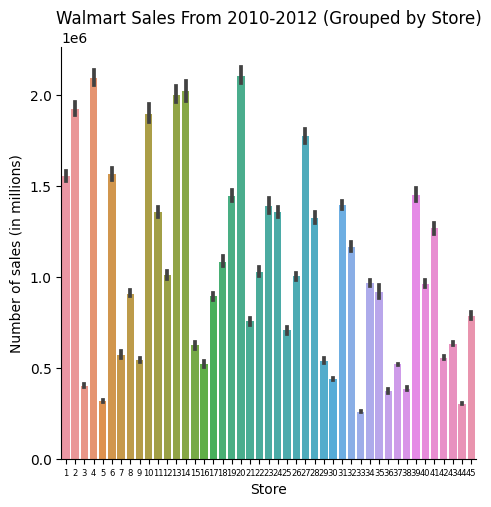

In [4]:
sns.catplot(data=walmart_df, x = "Store", y="Weekly_Sales", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Number of sales (in millions)")
plt.title("Walmart Sales From 2010-2012 (Grouped by Store)")
plt.show()

It can be hard to clearly see which store had the highest sales (in the case of store 20 vs. store 4) and lowest sales (in the case of store 5 vs. 33), so we took these candidates and compared them closer:

First, we split up the main dataframe by stores:

In [5]:
for x in range(1, 46):
    exec(f'Store{x}_df = walmart_df[walmart_df["Store"] == {x}]')

Now, we can look closer: The two highest (With value labels since it's still hard to see a winner)...

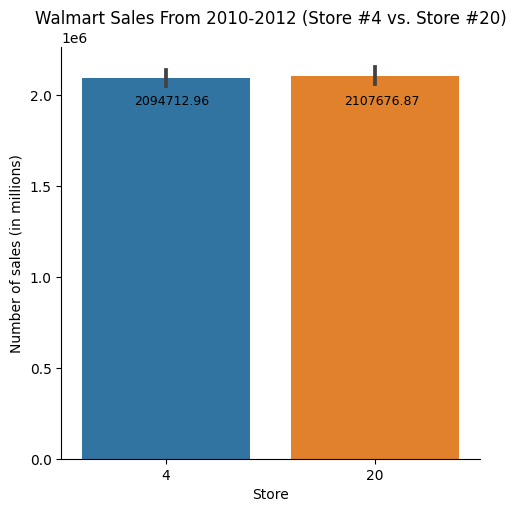

In [6]:
highestcompare = pd.concat([Store20_df, Store4_df])
sns.catplot(data=highestcompare, x = "Store", y="Weekly_Sales", kind="bar",)
plt.text(-0.15, 1950000, round(Store4_df["Weekly_Sales"].mean(), 2) , fontdict={ 'size': 9})
plt.text(.85, 1950000, round(Store20_df["Weekly_Sales"].mean(), 2) , fontdict={ 'size': 9})
plt.ylabel("Number of sales (in millions)")
plt.title("Walmart Sales From 2010-2012 (Store #4 vs. Store #20)")

plt.show()

...And the two lowest (Omitted value labels since it's far easier to see a winner):

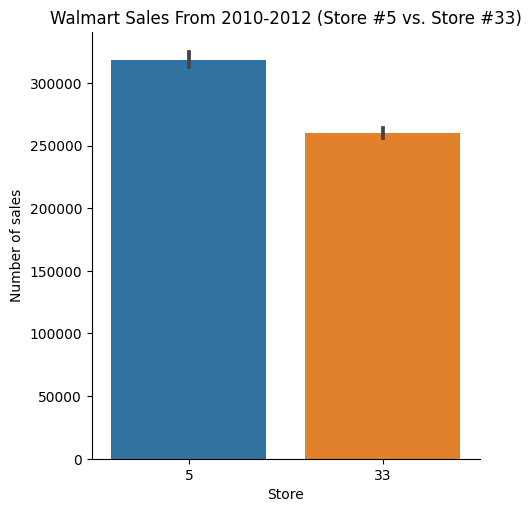

In [7]:
lowestcompare = pd.concat([Store5_df, Store33_df])
sns.catplot(data=lowestcompare, x = "Store", y="Weekly_Sales", kind="bar",)
plt.ylabel("Number of sales")
plt.title("Walmart Sales From 2010-2012 (Store #5 vs. Store #33)")

plt.show()

From this, we determined that the best and worst performing stores were stores 20 and 33, respectively.


Now, we can look at their average sales across the two year period:

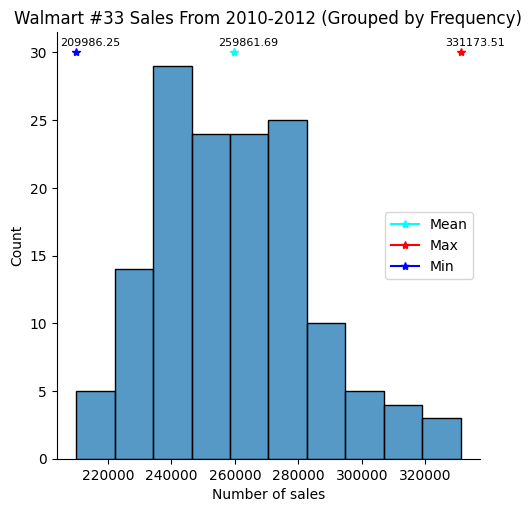

In [8]:
sns.displot(Store33_df, x="Weekly_Sales")

totalmean = round(Store33_df["Weekly_Sales"].mean(), 2)
totalmax = round(Store33_df["Weekly_Sales"].max(), 2)
totalmin = round(Store33_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 30, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5000, 30.5, totalmean , fontdict={ 'size': 8})
plt.plot(totalmax, 30, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 5000, 30.5, totalmax, fontdict={ 'size': 8})
plt.plot(totalmin, 30, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5000, 30.5, totalmin, fontdict={ 'size': 8})

plt.legend(loc='right')
plt.title("Walmart #33 Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales")

plt.show()

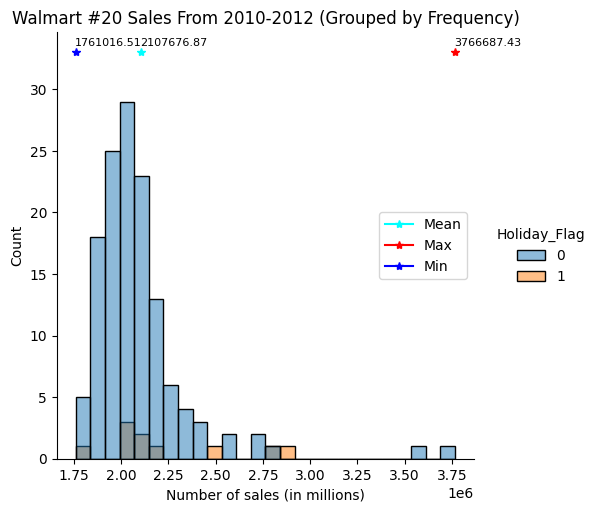

In [9]:
sns.displot(Store20_df, x="Weekly_Sales", hue="Holiday_Flag")

totalmean = round(Store20_df["Weekly_Sales"].mean(), 2)
totalmax = round(Store20_df["Weekly_Sales"].max(), 2)
totalmin = round(Store20_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 33, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5000, 33.5, totalmean , fontdict={ 'size': 8})
plt.plot(totalmax, 33, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 5000, 33.5, totalmax, fontdict={ 'size': 8})
plt.plot(totalmin, 33, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5000, 33.5, totalmin, fontdict={ 'size': 8})

plt.legend(loc='right')
plt.title("Walmart #20 Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales (in millions)")

plt.show()

The sales from store 33 seems to be a lot more consistent than the sales from store 22! Further, we looked at which weeks contained holidays for store 20 to account for the weeks where sales broke 3.5 million and found that holidays were not present on those weeks (But we did find that the temperature for the week of the 3.7 million average weekly sale was in the 20s)

It's worth noting that according to the upload for our data source, 4 holidays were accounted for: Superbowl Week, Thanksgiving, Christmas, and Labor Day.

Finally, to compare the stats of these to stores to the total average: The max across all Walmarts didn't come from store 20, surprisingly, but the min across all Walmarts did come from store 33. The total average sat around 1 million, with 20's average doubling that and 33's average sitting at around 250,000, making it closer to the total average.

Now let's look at the Unemployment, starting with a graph of the unemployment % occurence:

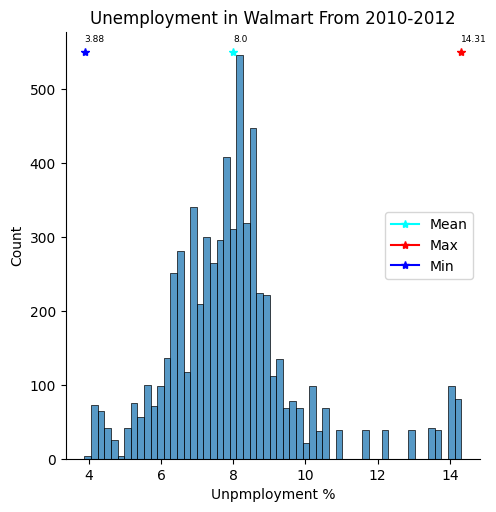

In [10]:
#Unemployment up CPI down
sns.displot(walmart_df, x="Unemployment")

mean = round(walmart_df["Unemployment"].mean(),2)
max = round(walmart_df["Unemployment"].max(),2)
min = round(walmart_df["Unemployment"].min(),2)

plt.plot(mean, 550, marker="*", label="Mean", color = "cyan")
plt.text(mean, 565, mean, fontdict={'size': 6.5})
plt.plot(max, 550, marker="*", label="Max", color = "red")
plt.text(max, 565, max, fontdict={'size': 6.5})
plt.plot(min, 550, marker="*", label="Min", color = "blue")
plt.text(min, 565, min, fontdict={'size': 6.5})
plt.legend(loc='right')

# print(f"max={max},min={min},mean={mean}")
plt.title("Unemployment in Walmart From 2010-2012")
plt.xlabel("Unpmployment %")

plt.show()

Now we find the stores with the most unemployment:

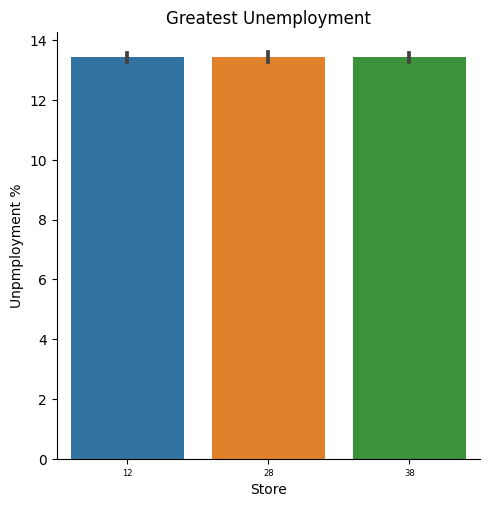

In [11]:
greatest = walmart_df[walmart_df["Unemployment"] > 11]

sns.catplot(greatest, x = "Store", y="Unemployment", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Unpmployment %")
plt.title("Greatest Unemployment")
plt.show()

Here we can see that stores 12, 28, and 38 have the highest unemployment...

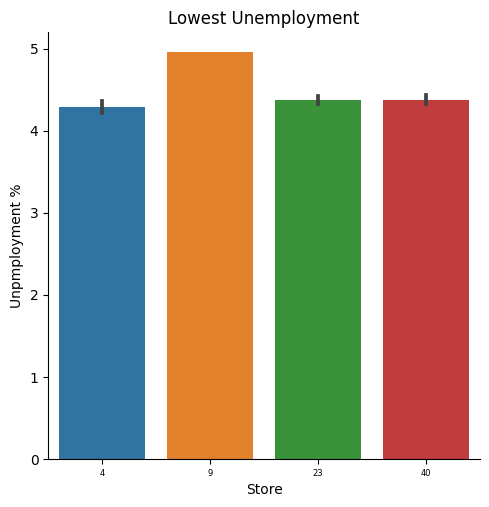

In [12]:
sns.catplot(walmart_df[walmart_df["Unemployment"] < 5], x = "Store", y="Unemployment", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Unpmployment %")
plt.title("Lowest Unemployment")
plt.show()

And here we can see that stores 4, 23, and 40 have the least.

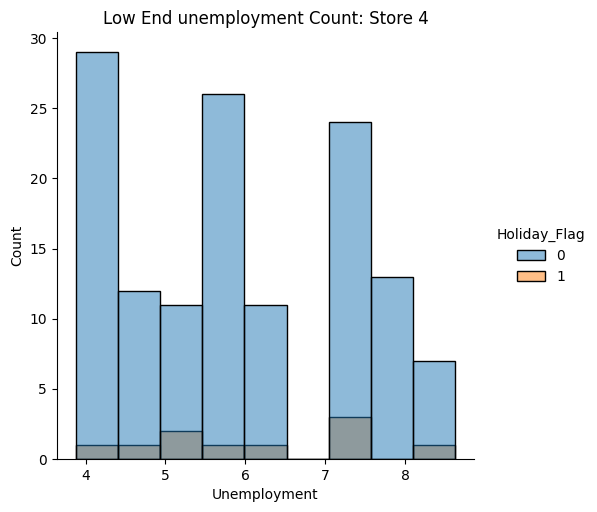

In [13]:
sns.displot(Store4_df, x="Unemployment", hue="Holiday_Flag")
plt.title("Low End unemployment Count: Store 4")
plt.show()

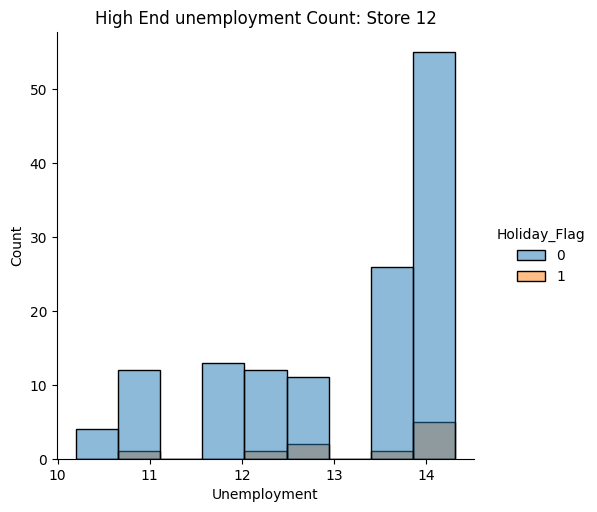

In [14]:
sns.displot(Store12_df, x="Unemployment", hue="Holiday_Flag")
plt.title("High End unemployment Count: Store 12")
plt.show()

We can see that these stores, especially 12, are very consistent in unemployment rate. Additionally, when plotting their rate against Customer Price Index (CPI), we see...

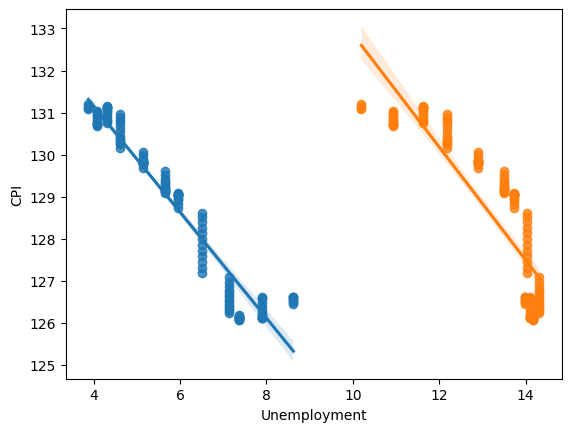

In [15]:
sns.regplot(Store4_df, x="Unemployment", y="CPI")
sns.regplot(Store12_df, x="Unemployment", y="CPI")
plt.show()

We see a noticeable negative correlation between Unemployment and CPI.

Finally, we looked at correlations between CPI and the walmart database,
especially weekly_sales.

Below we have a chart displaying the range and frequency of CPI in the walmart dataframe.


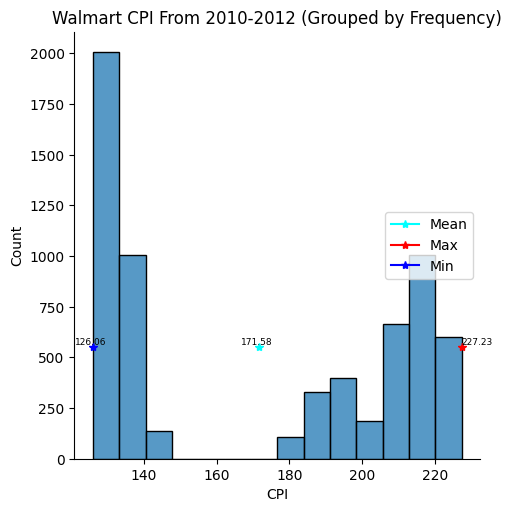

In [16]:
sns.displot(walmart_df, x="CPI")

totalmean = round(walmart_df["CPI"].mean(), 2)
totalmax = round(walmart_df["CPI"].max(), 2)
totalmin = round(walmart_df["CPI"].min(), 2)

plt.plot(totalmean, 550, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5, 565, totalmean , fontdict={ 'size': 6.5})
plt.plot(totalmax, 550, marker = "*", label = "Max", color = "red")
plt.text(totalmax - .01, 565, totalmax, fontdict={ 'size': 6.5})
plt.plot(totalmin, 550, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5, 565, totalmin, fontdict={ 'size': 6.5})

plt.legend(loc='right')
plt.title("Walmart CPI From 2010-2012 (Grouped by Frequency)")
plt.xlabel("CPI")

plt.show()

We make comparisons using correlation heatmap on the high performing store and the low performing store:

You can see that there is a strong negative correlation between CPI and Unemployment for the region relevant to each
of the stores, and that store 33 has the strongest negative correlation at around -.96, with store 20 sitting at around
-.73

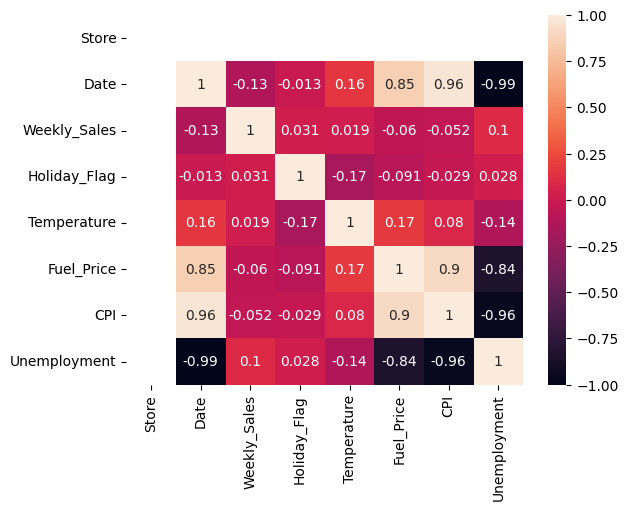

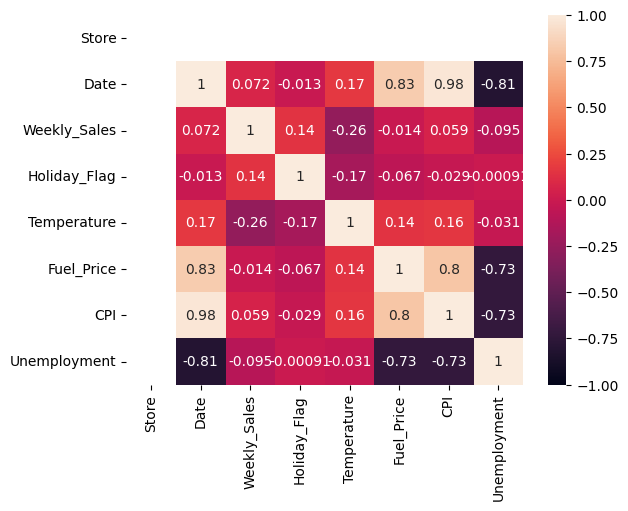

In [17]:
heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 20].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

To better compare relevant data we printed out the heatmap for each store for comparison. After analyzing we prepared to find stores with similar characteristics and group them into their dataframes. We only chose to include factors that were relevant most to the two stores above. 

Store: 1


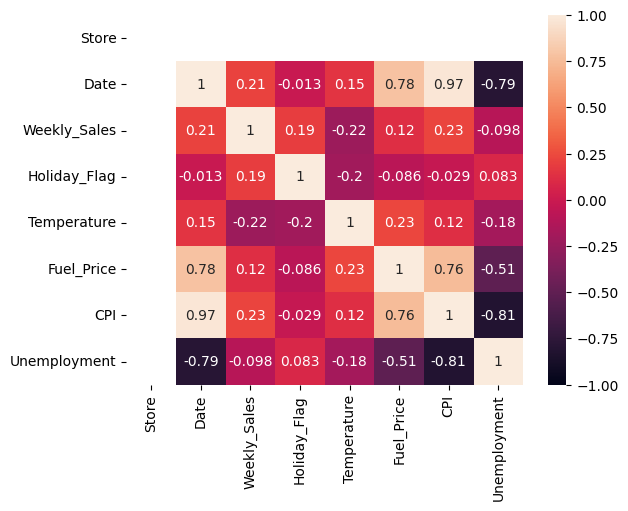

Store: 2


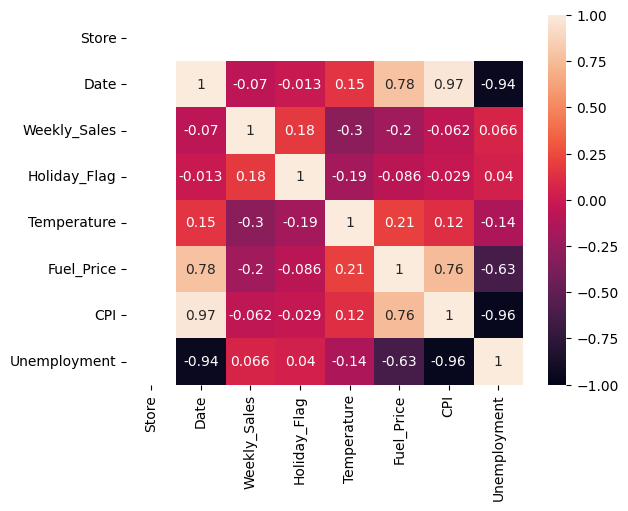

Store: 3


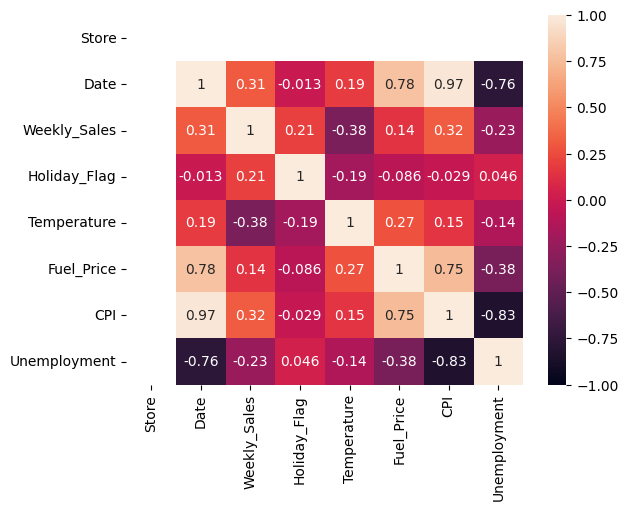

Store: 4


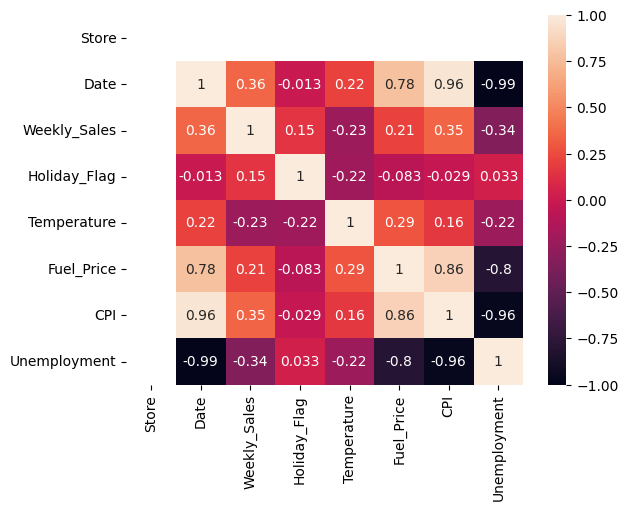

Store: 5


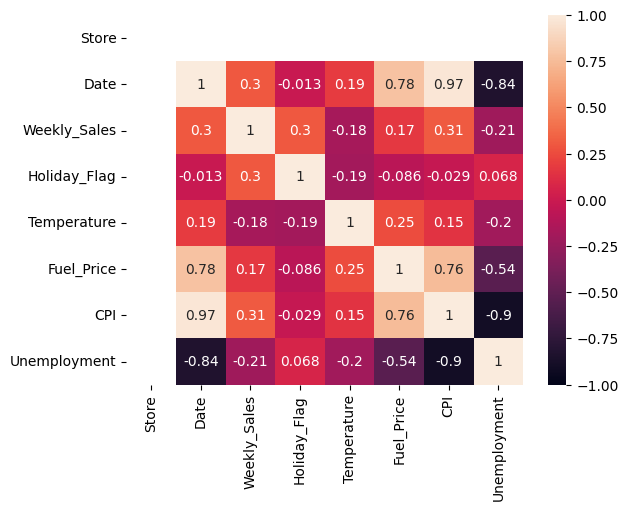

Store: 6


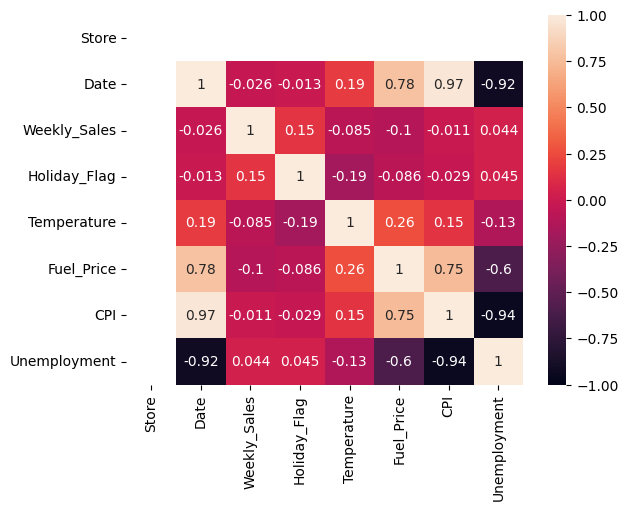

Store: 7


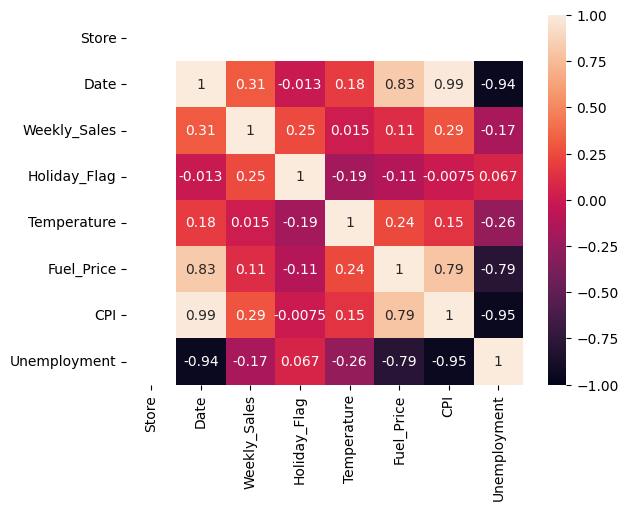

Store: 8


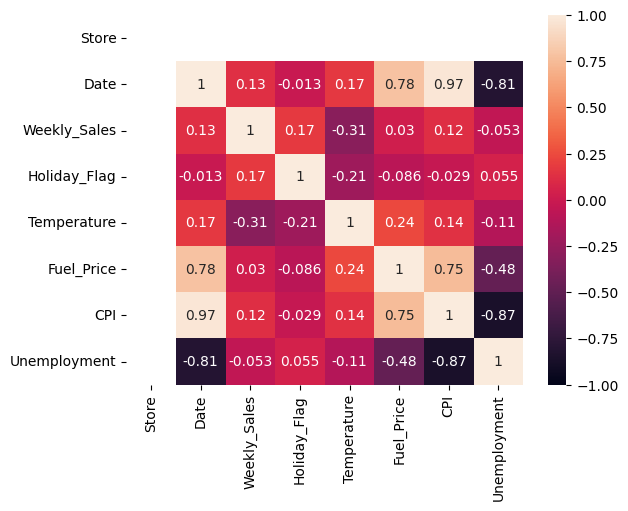

Store: 9


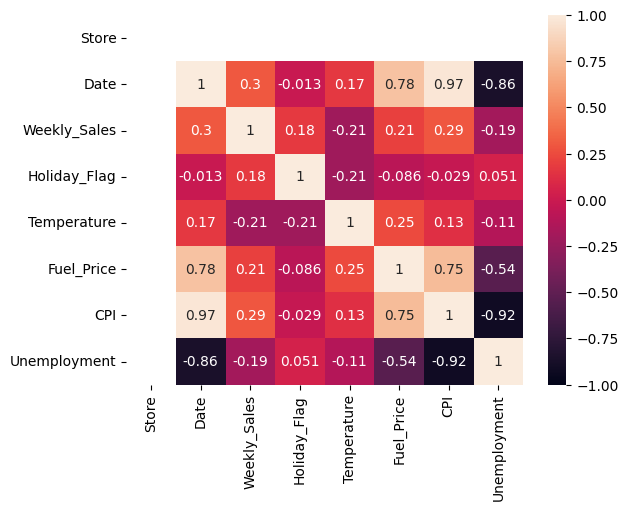

Store: 10


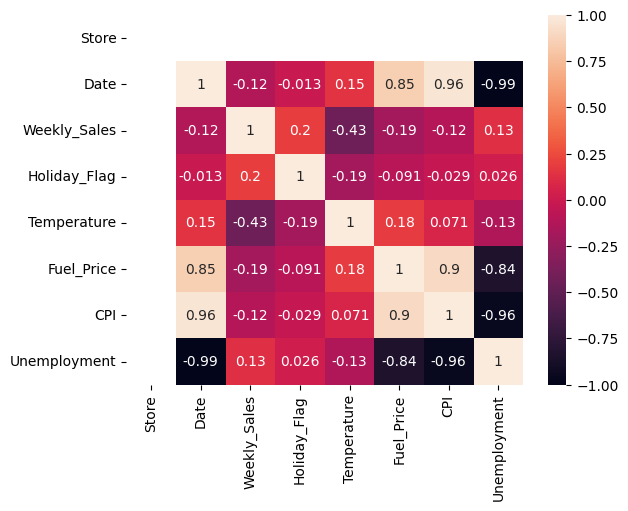

Store: 11


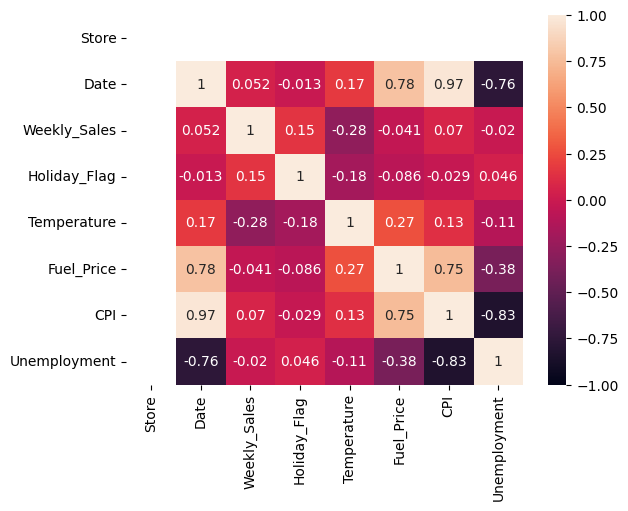

Store: 12


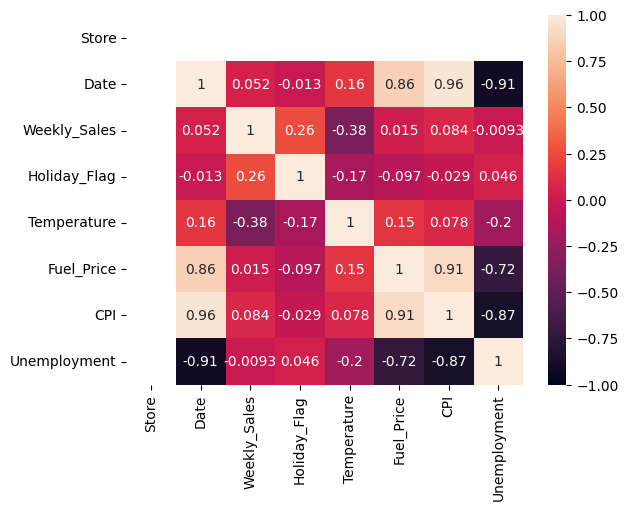

Store: 13


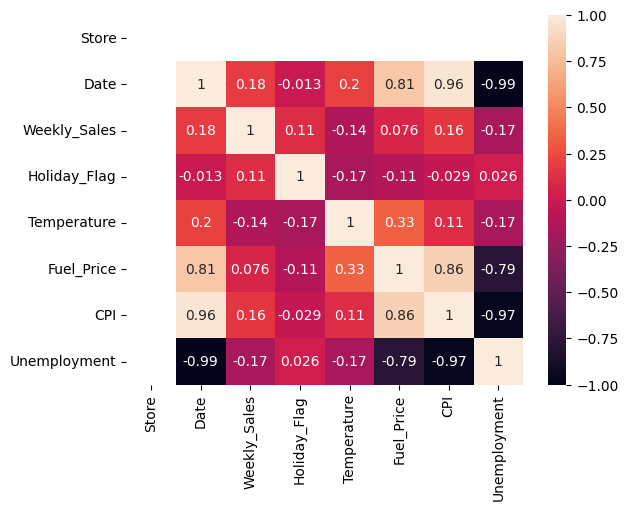

Store: 14


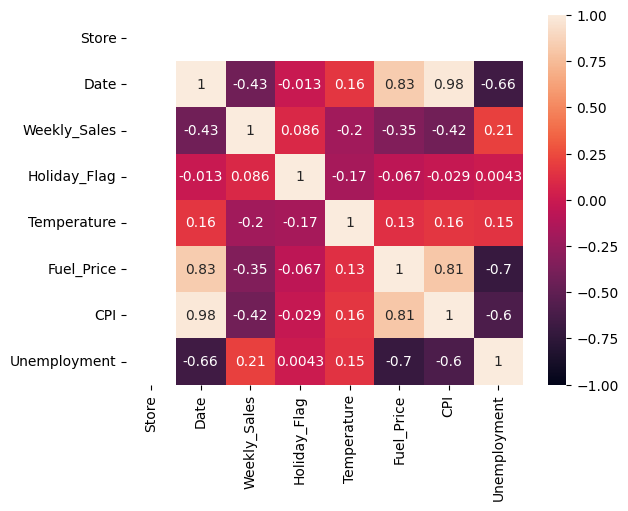

Store: 15


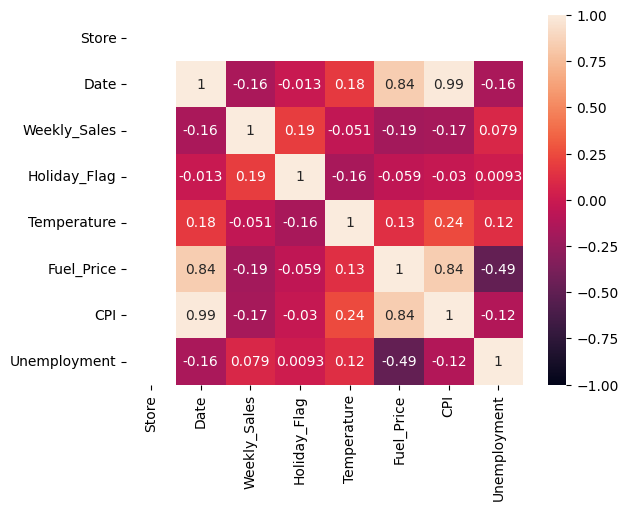

Store: 16


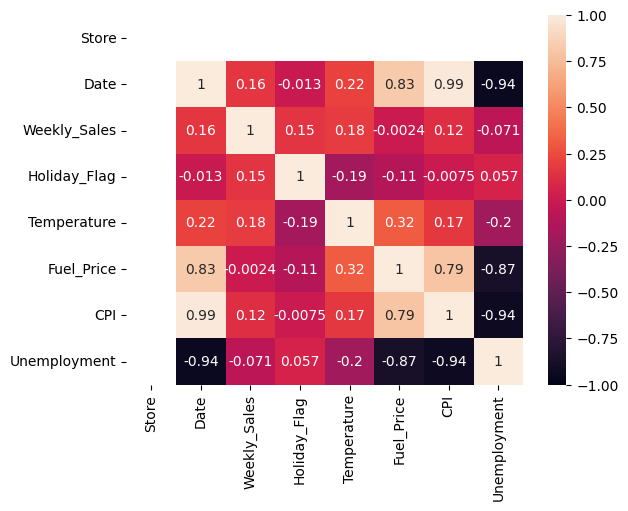

Store: 17


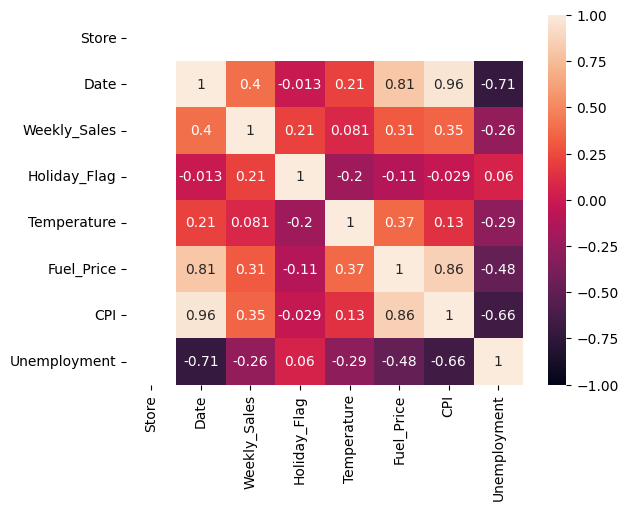

Store: 18


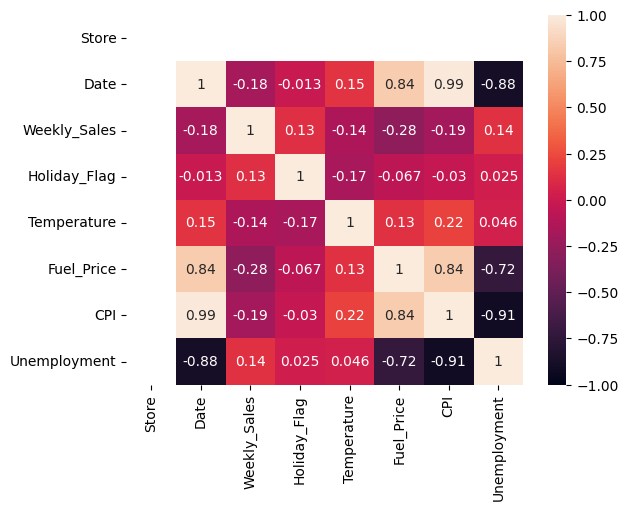

Store: 19


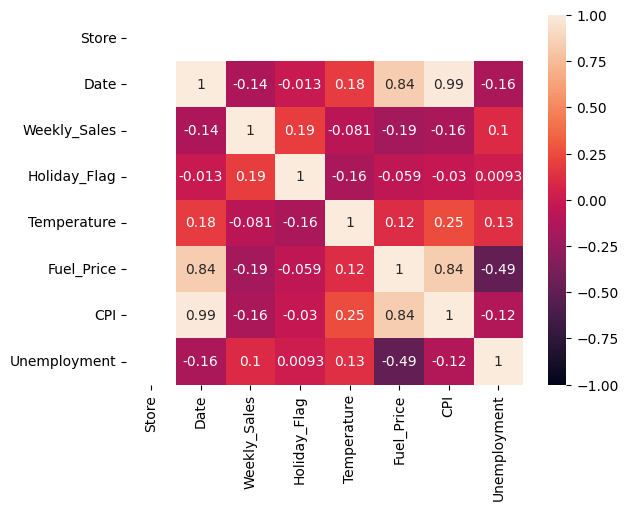

Store: 20


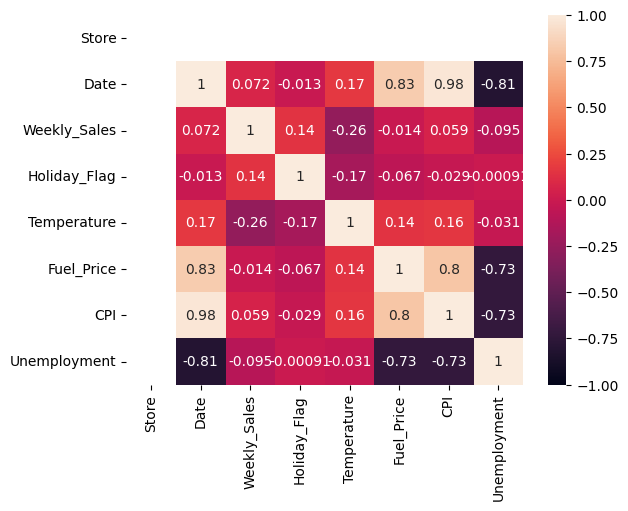

Store: 21


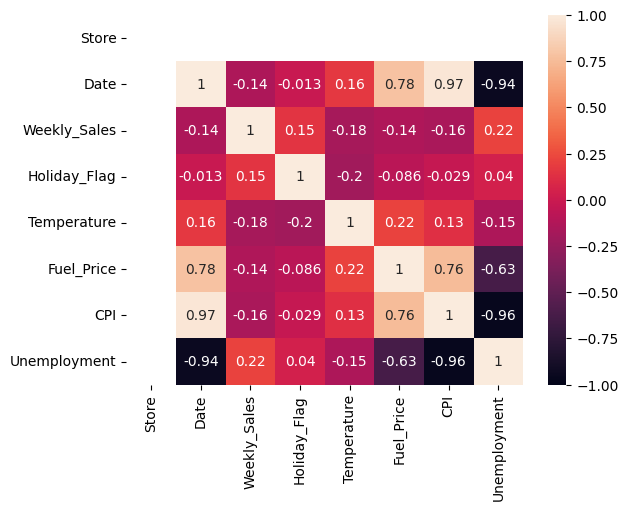

Store: 22


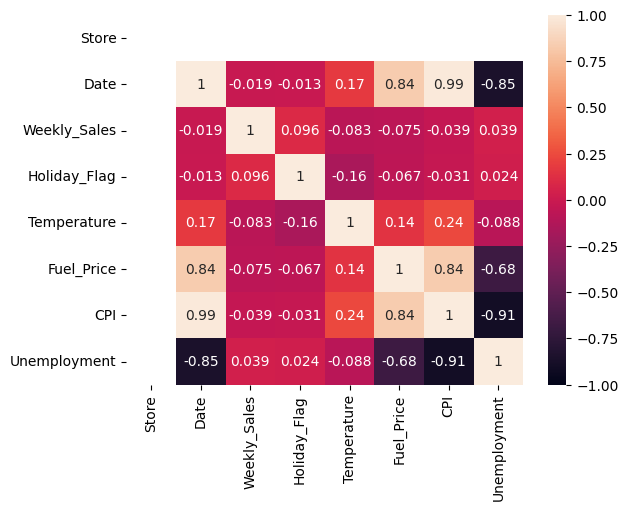

Store: 23


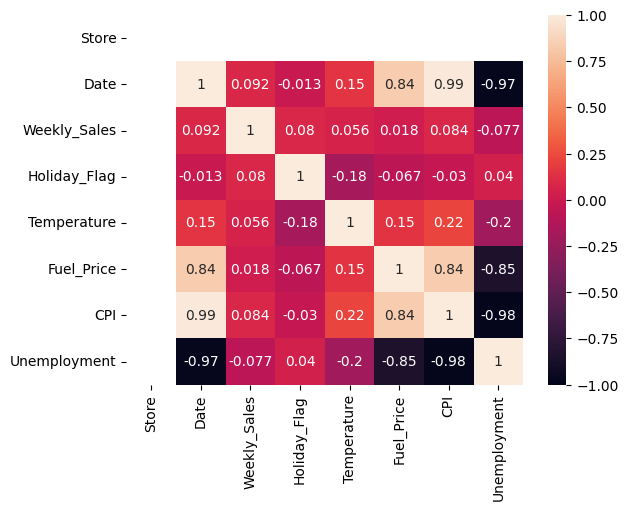

Store: 24


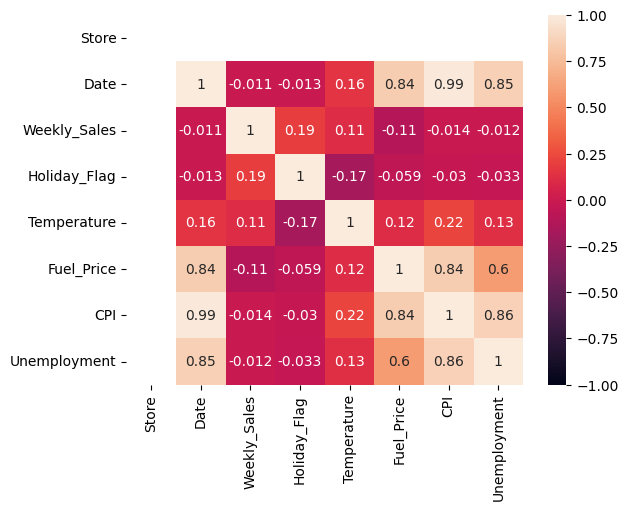

Store: 25


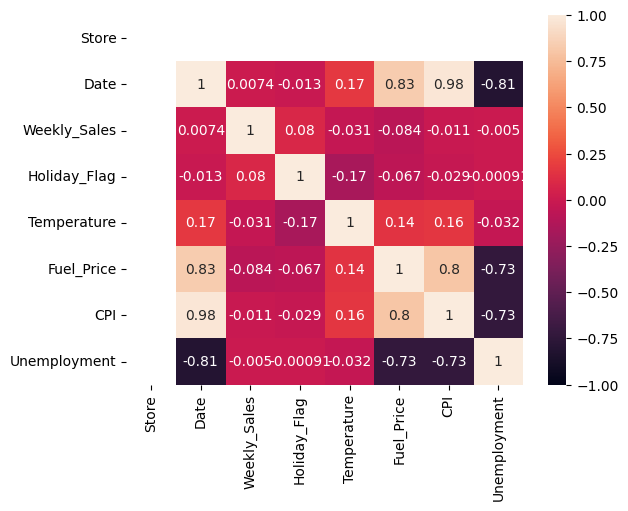

Store: 26


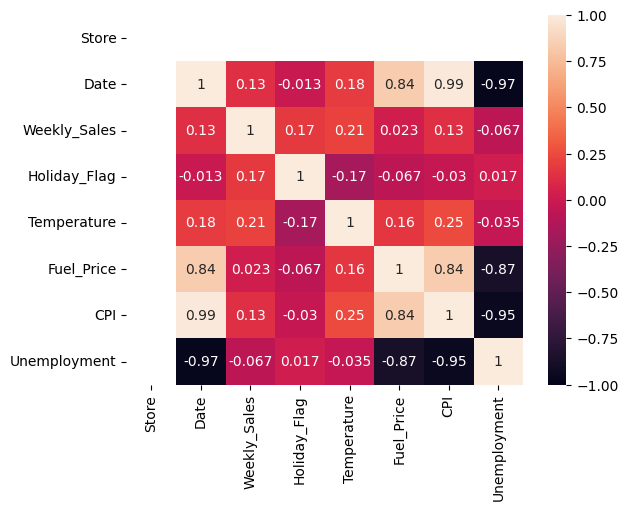

Store: 27


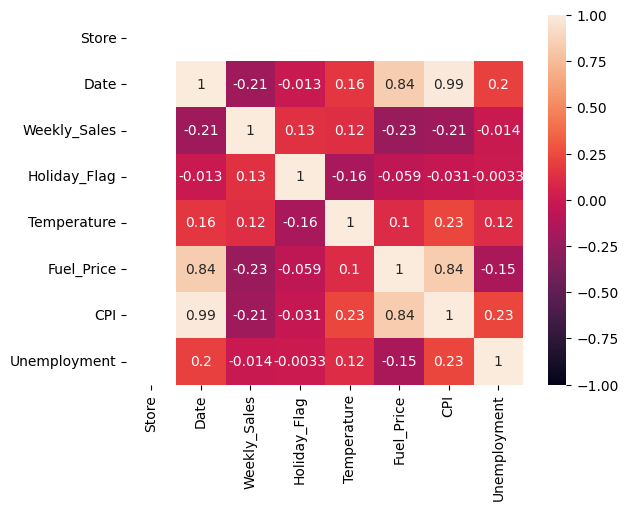

Store: 28


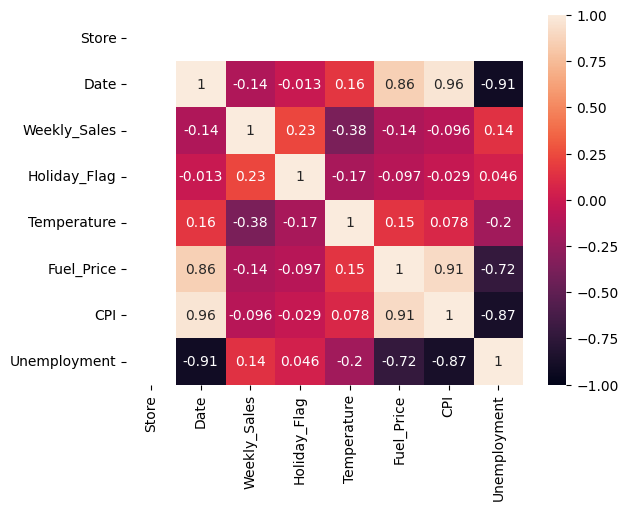

Store: 29


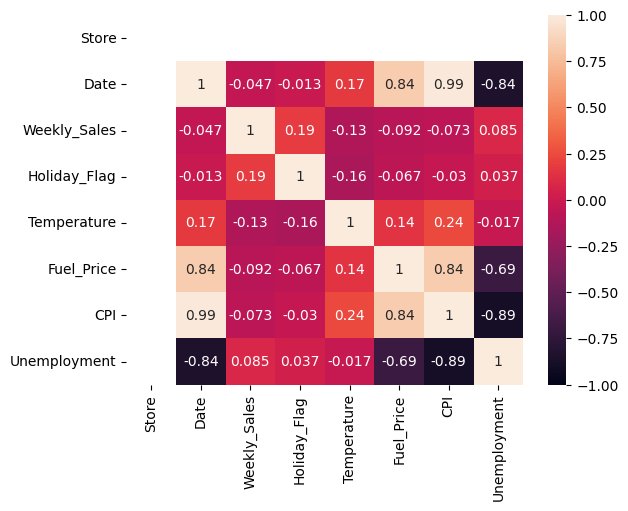

Store: 30


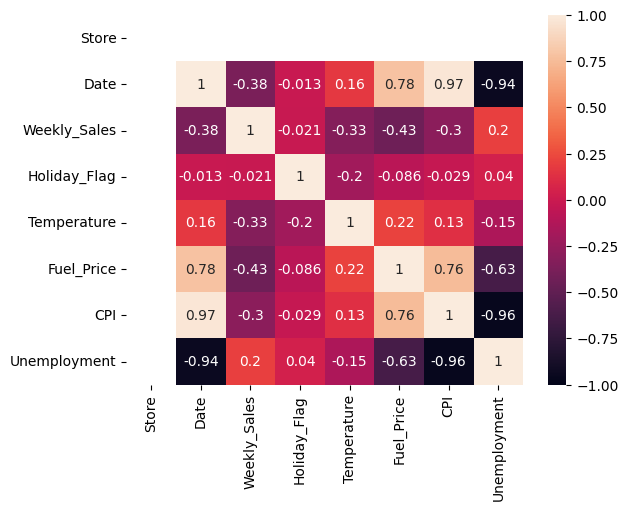

Store: 31


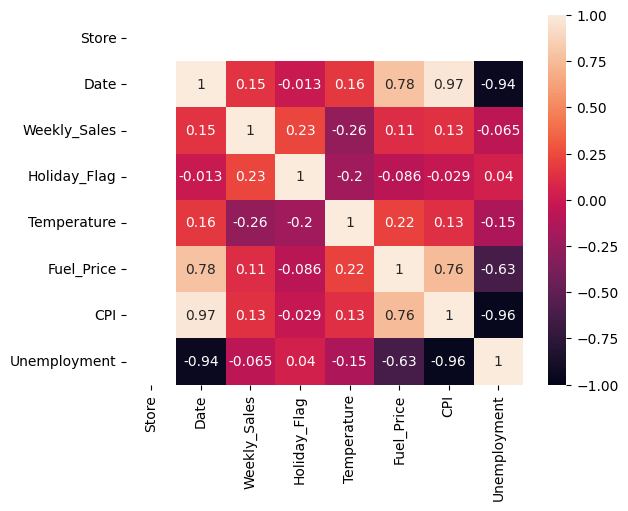

Store: 32


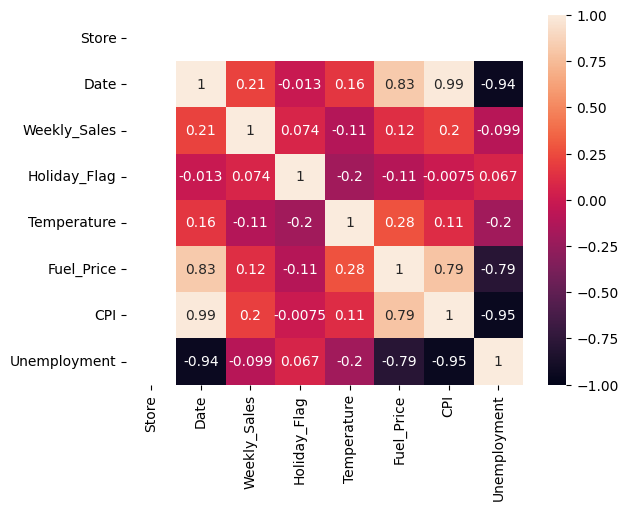

Store: 33


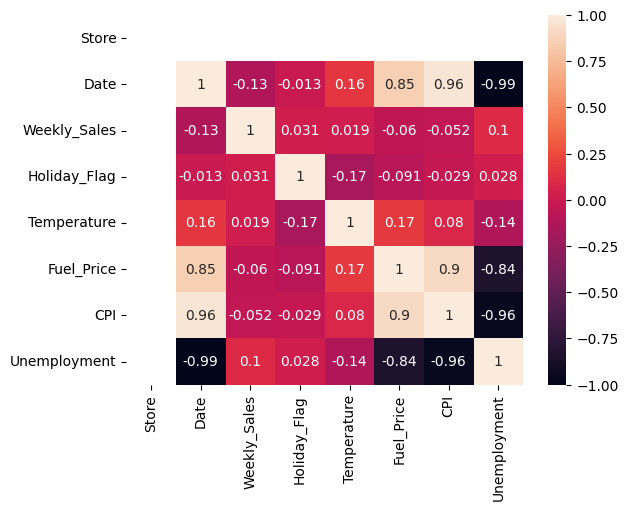

Store: 34


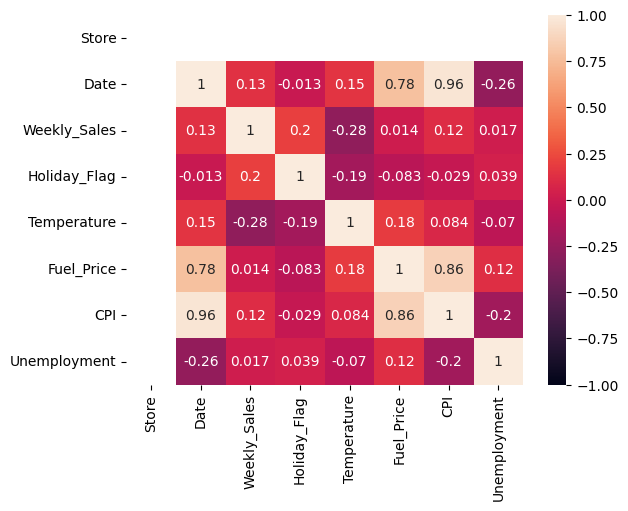

Store: 35


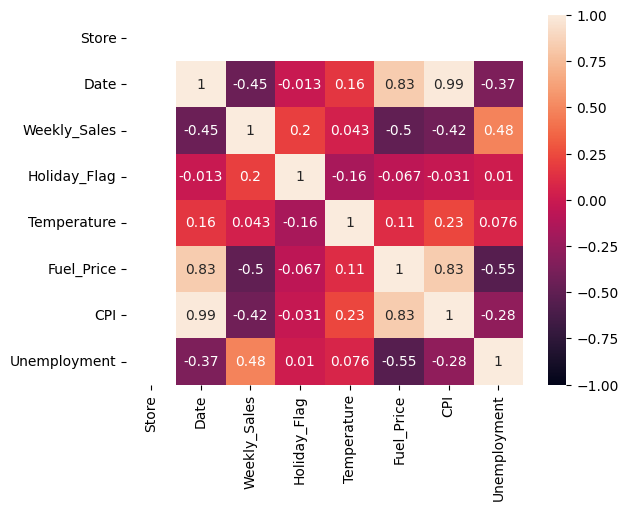

Store: 36


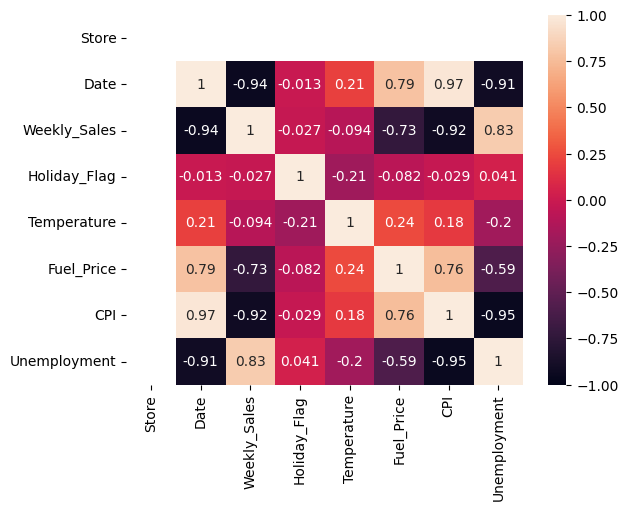

Store: 37


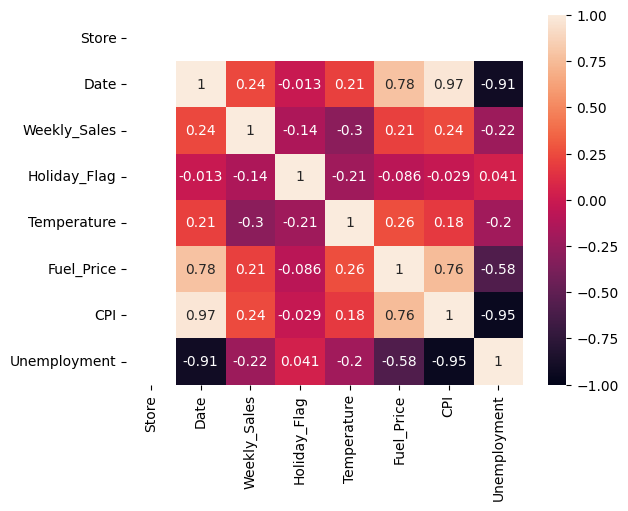

Store: 38


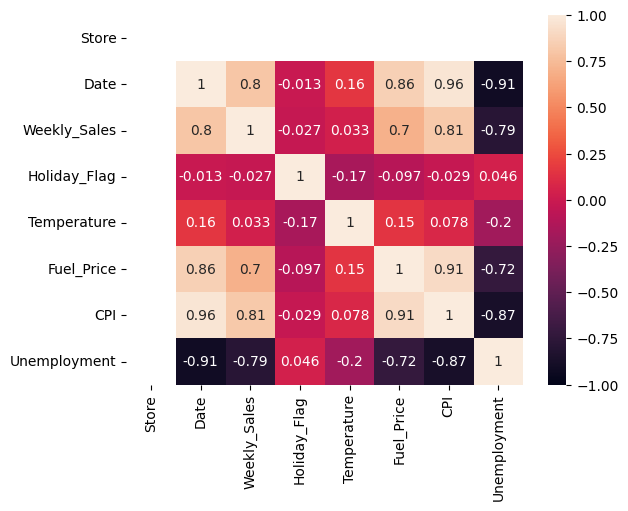

Store: 39


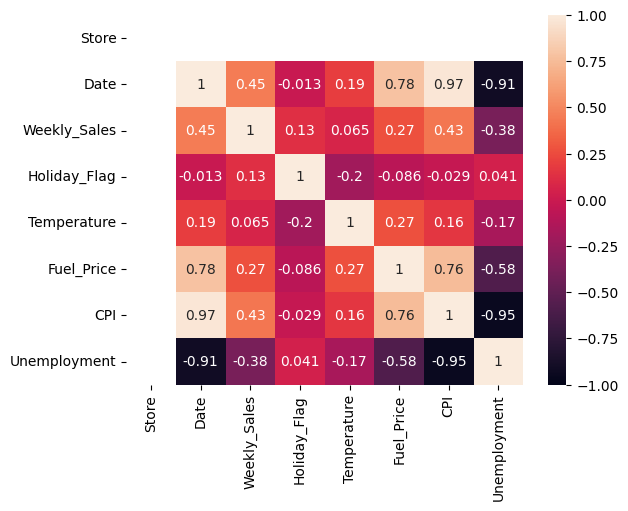

Store: 40


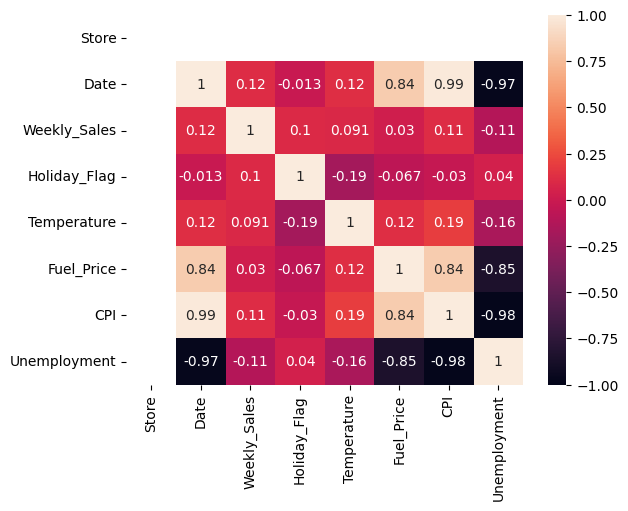

Store: 41


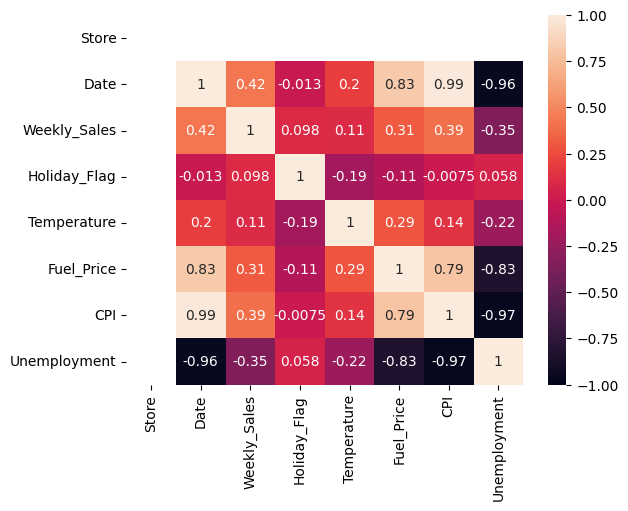

Store: 42


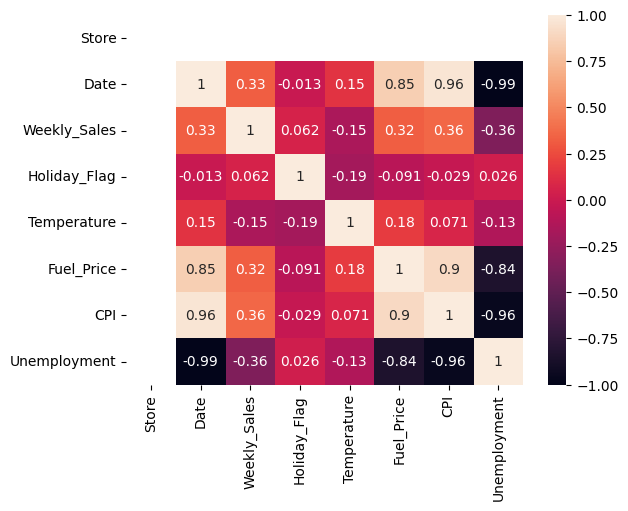

Store: 43


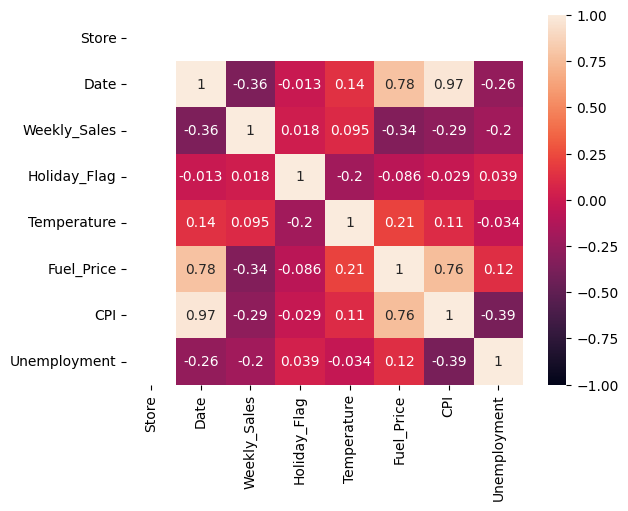

Store: 44


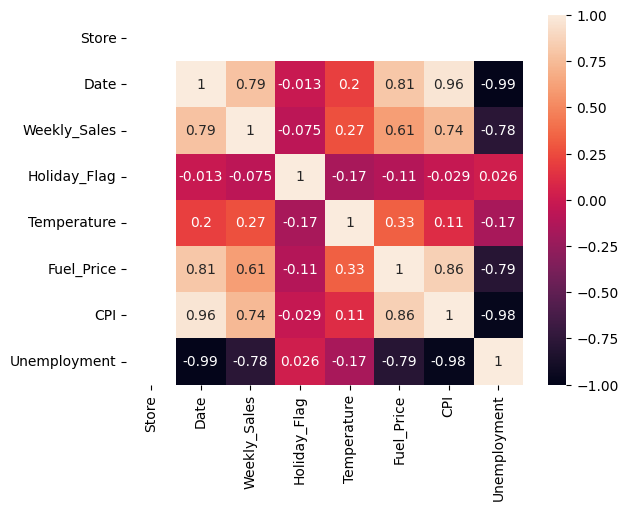

Store: 45


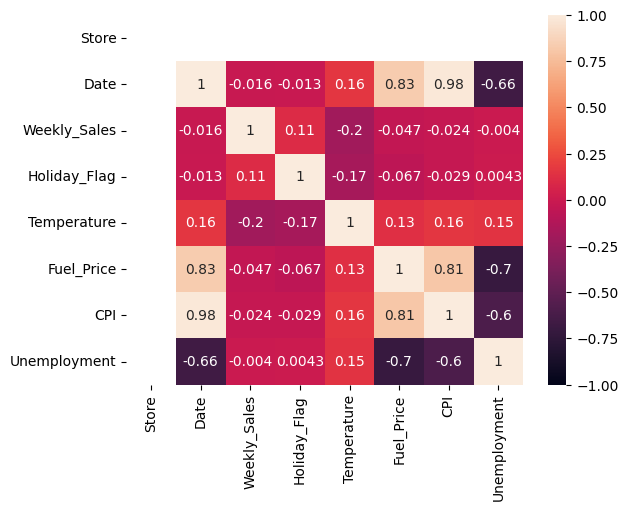

In [18]:
for x in range(1, 46):
    heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == x].corr(), vmin=-1, vmax=1, annot=True)
    print(f'Store: {x}')
    plt.show()

Below, we creatred 3 new dataframes with Stores containing the following correlations:

A strong negative or positive correlation between CPI and Weekly_Sales:
Stores 36, 33, 38

A strong negative or possitive correlation between CPI and Unemployment:
Stores 44, 23, 40, 24, and 27.

A strong negative or positive correlation between Fuel_Prices and Weekly_Sales:
Stores 30, 35, 36, 38

In [19]:
CPI_Weekly_df = pd.concat([Store36_df, Store44_df, Store38_df])

CPI_Unemployement_df = pd.concat([Store44_df, Store23_df, Store40_df, Store24_df, Store27_df])

Fuel_Weekly_df = pd.concat([Store30_df, Store35_df, Store36_df, Store38_df])

We chose to use a smooth kernal density chart with marginal histograms.

Below each of those, we also included charts for each store showing the regression for each store in regards to their
CPI and their Weekly_Sales.

The charts below show just how drastically the CPI and weekly sales are correlated towards one another.

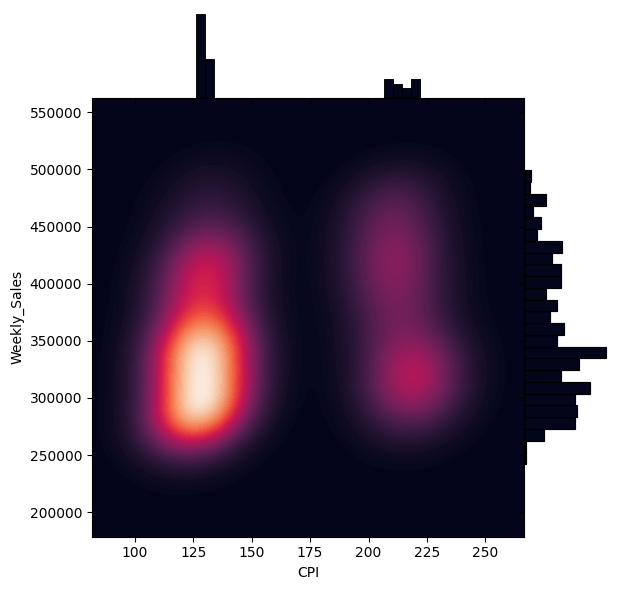

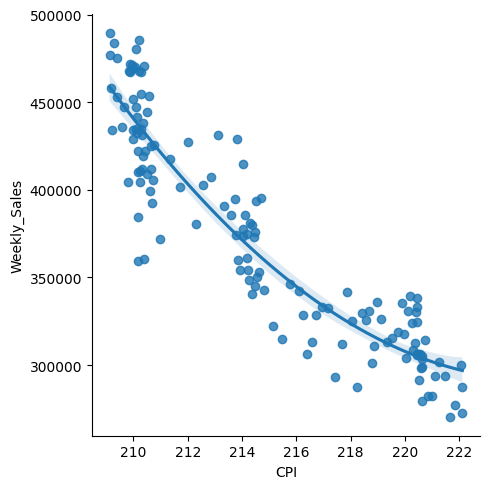

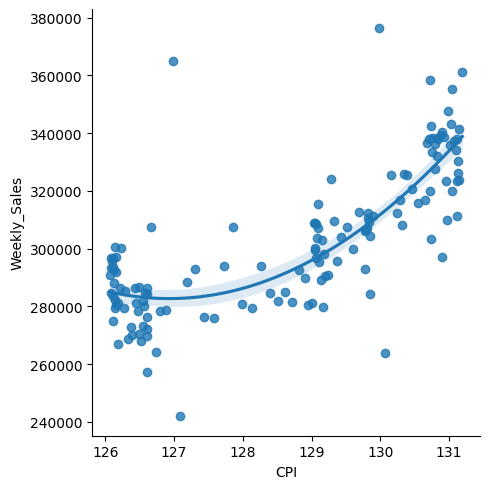

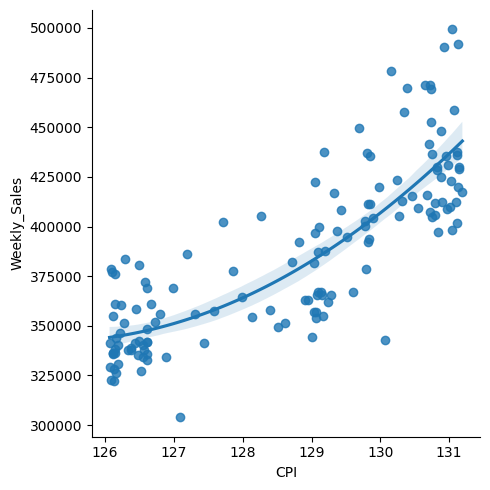

In [20]:
g = sns.JointGrid(data=CPI_Weekly_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store44_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store38_df, ci=90, order=2)

Using the same to factors as before, we repeated the process, but with Stores that had strong correlations between
fuel and weekly sales.

There doesnt seem to be an obvious pattern here, since some of the slopes indicate slight negative and positive slopes
regarding weekly sales and CPI.

Further, the range of data for the fuel-to-weekly_sales correlation is higher than the previous comparison between
CPI and weekly sales. From this, we could make the inference that stores with high correlation between CPI and weekly_sales
generally have lower quantities in weekly sales. We could also make the assumption that when fuel has a stronger correlation with weekly sales,
the CPI affects the weekly sales much less.

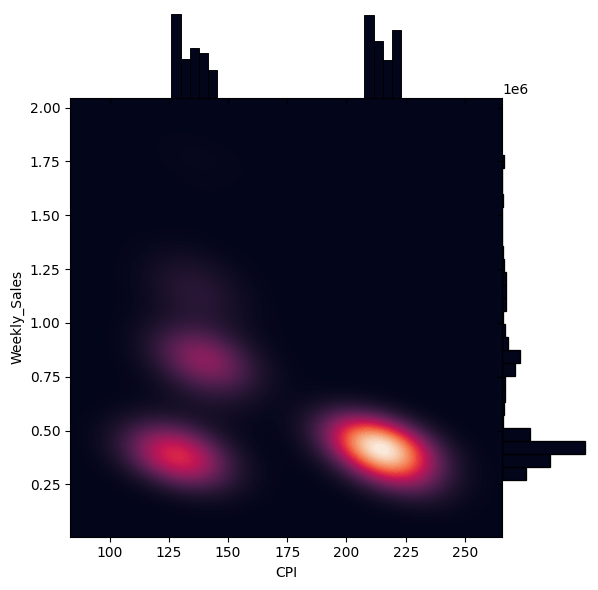

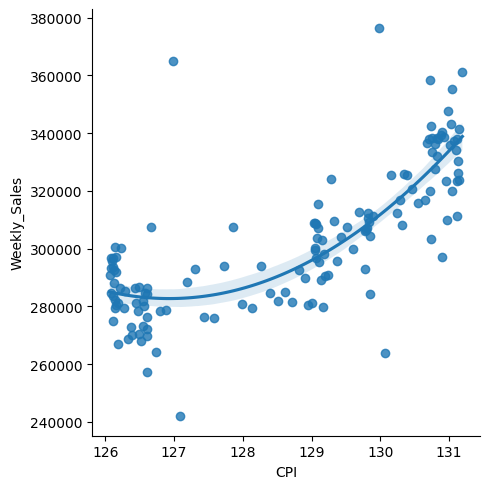

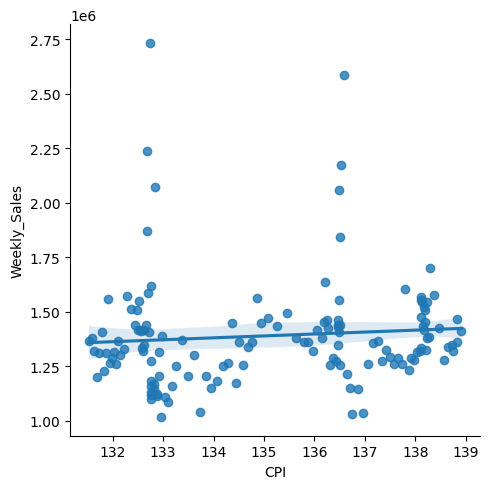

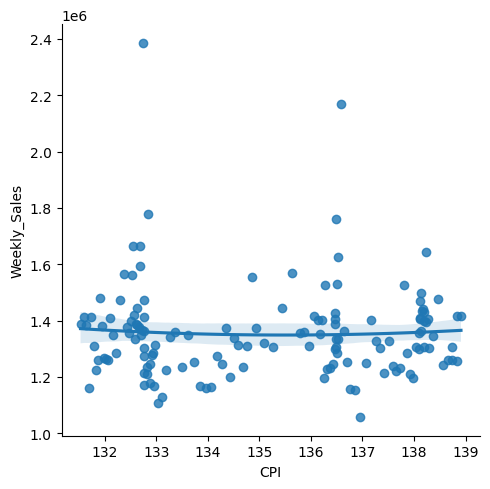

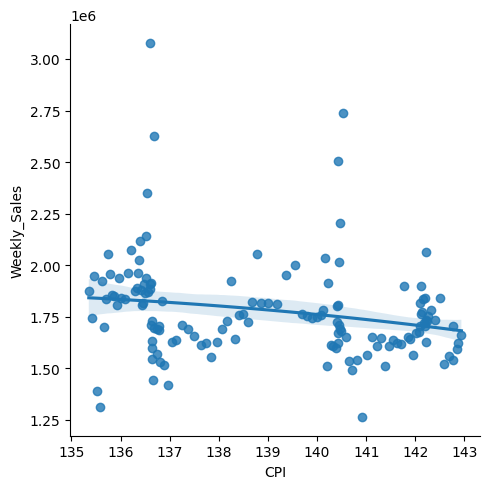

In [21]:
g = sns.JointGrid(data=Fuel_Weekly_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store44_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store23_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store24_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store27_df, ci=90, order=2)

Below, we have instances where correlation between CPI and unemployment are strong. On this graph, you will notice that the slopes are much stronger
 regarding the relation between CPI and weekly sales. With the majority of the occuring as strong negative slopes, however, store 38 does possess a strong positive slope.
 
The average for this graph lies somewhere between 1 and 1.5 million in weekly sales: Much higher than the previous 2 instances. 

From this, we may infer that stores where the CPI and unemployment correlates most strongly have a higher likelihood of a correlation with weekly sales and CPI.

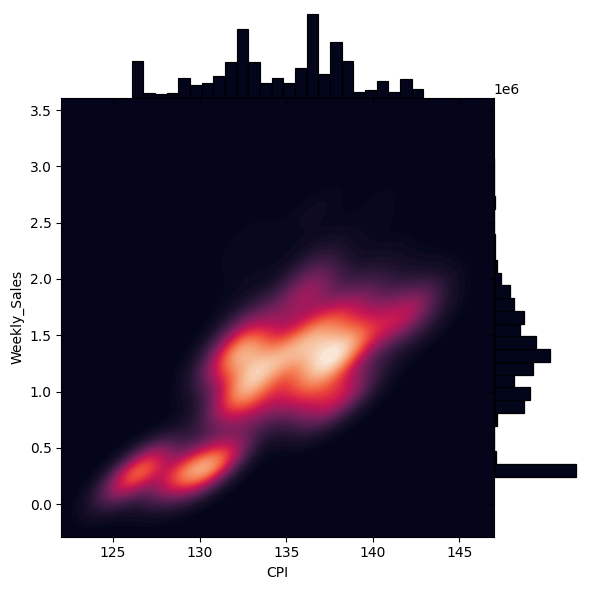

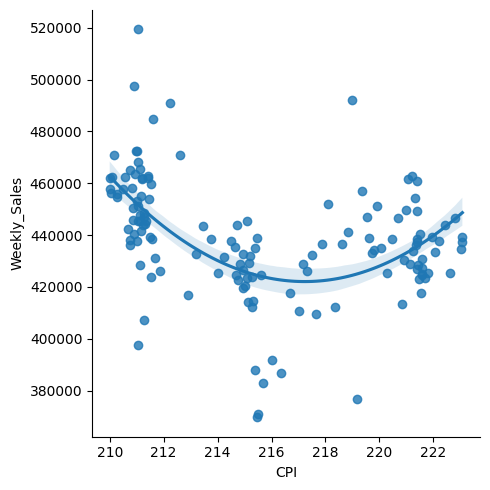

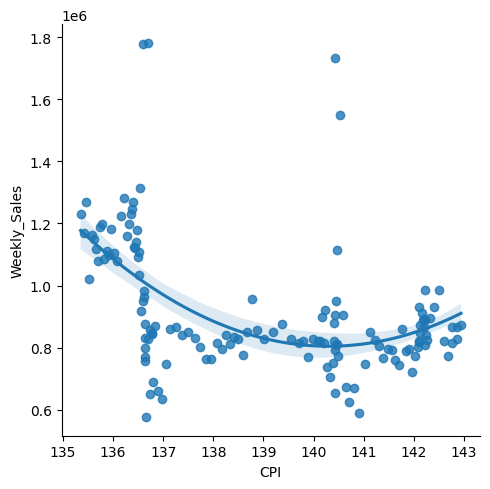

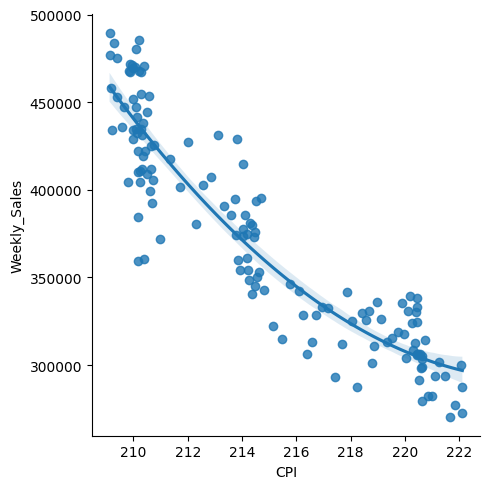

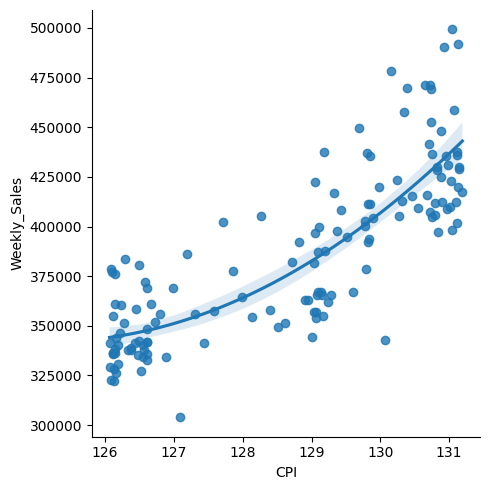

In [22]:
g = sns.JointGrid(data=CPI_Unemployement_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store30_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store35_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store38_df, ci=90, order=2)

With that, let's go back and revisit our high and low store instances.

The low instance has a really strong negative correlation between unemployment and CPI, however, the sales seem to show a slope that isn't too postive or negative.
If you refer back to the correlation heatmap above, you will see that the correlation between CPI and weekly sales is low, despite that, we still see a curve overall.
The fuel to sales correlation is also low, which normally indicate a less curved line overall.

The heatmap density map below shows that the most weekly sales occur at around 130 CPI.

It is important to remember that a lot of factors are in play here: The region, the population of the surrounding area, and the scale of warehouse all are not accounted for in this project, so even though inferences can be made, without more data they cannot be made clear for every instance, especially outliers such as this one.

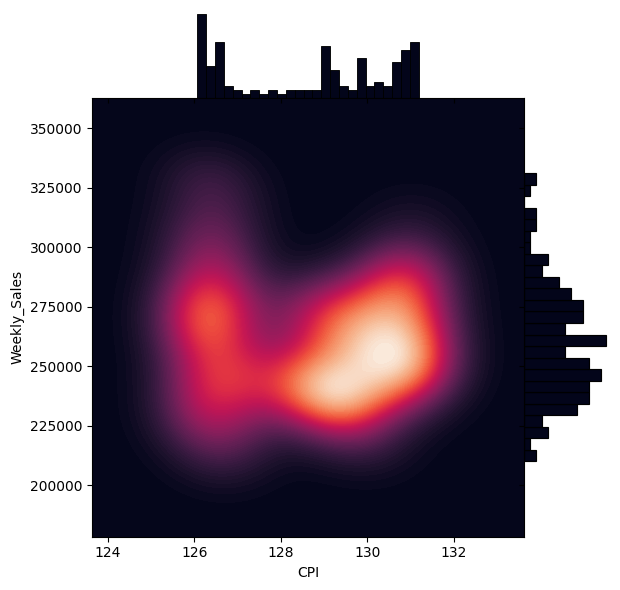

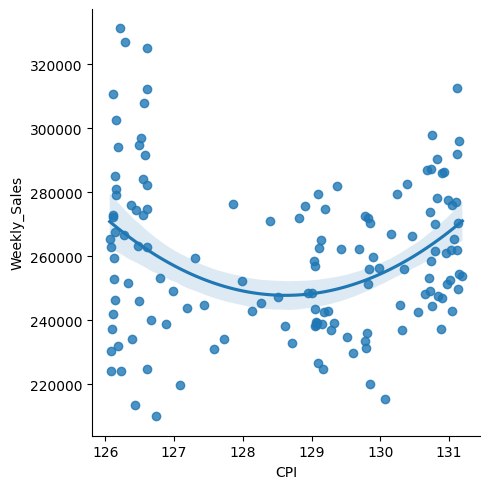

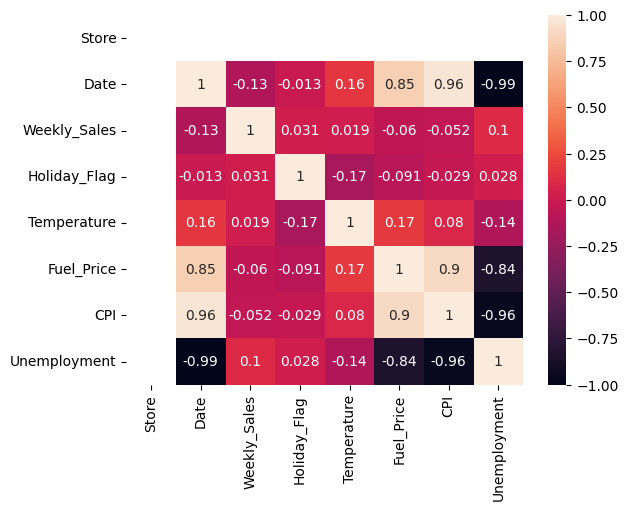

In [23]:
g = sns.JointGrid(data=Store33_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)


sns.lmplot(x='CPI', y='Weekly_Sales', data=Store33_df, ci=90, order=2)
plt.show()

heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Referring to the correlation heatmap above, a few distinguishing factors for store 20 stand out:

It has a CPI to unemployment correlation .23 points higer than store 33, at -.73 which is low compared to some stores.
It's CPI to weekly sales correlation is almost 0, similar to store 33.

From the density chart below, we see that there are 3 points where the sales density spikes: below 205, at around 208, and at just below 215.

Once again, it is hard to make an inference, and we believe this issue stems from the fact that in both the high and low instances, they have a week CPI to weekly sales correlation overall.

However, the curve is less noticable here, even though the fuel to weekly sales correlation is also low.

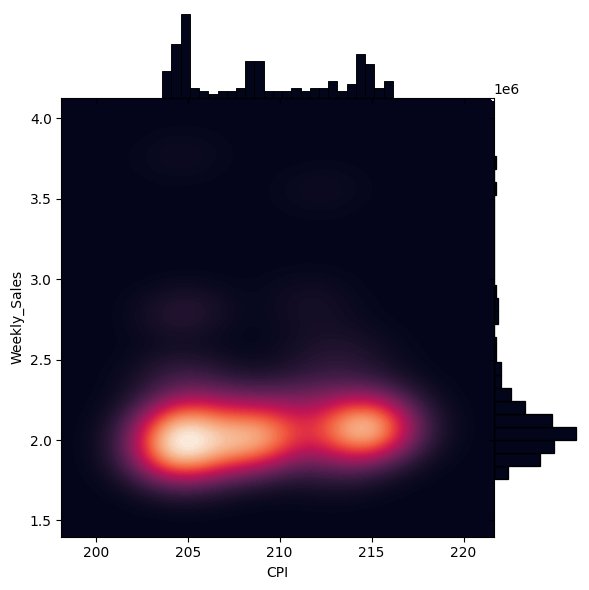

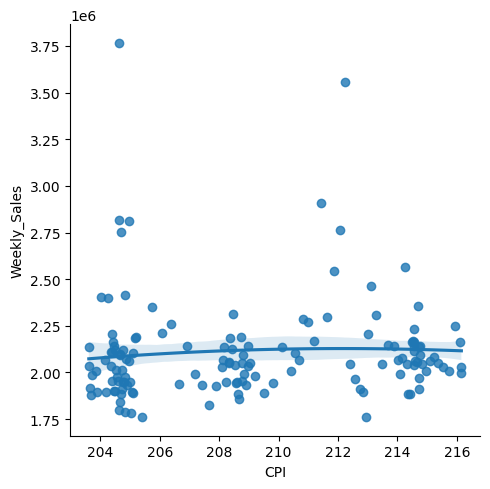

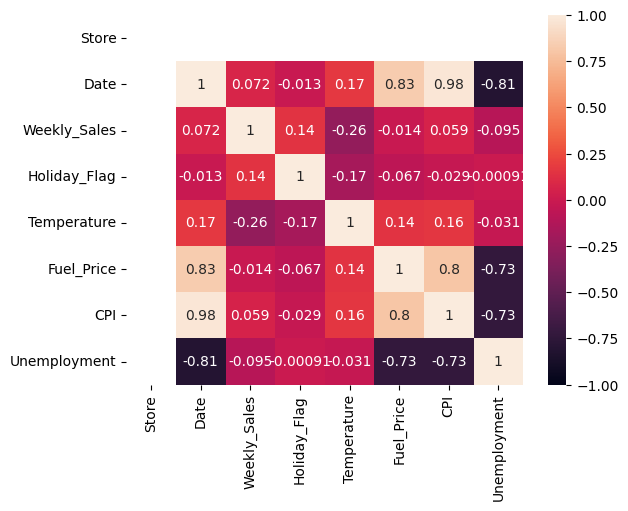

In [24]:
g = sns.JointGrid(data=Store20_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store20_df, ci=90, order=2)
plt.show()


heatmap = sns.heatmap(Store20_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Let's now refer to a couple of instances where the slope is strong.

Store 38 has a strong positive slope regarding CPI and weekly sales, and store 36 has a strong negative slope between the two.

Two things most notable when comparing these two instances is their placement along the CPI. Store 38 is placed ranging between 124 and 134 sloping upward, while store 36 ranges between 208 and 222 sloping downward.

The correlation between fuel and weekly sales are high, and most notably they are almost exactly the opposite of one another. The unemployment to CPI correlation is also high in both instances.

To get an idea of where these two stores may lie on the chart, we look at the Walmart dataframe as a whole:

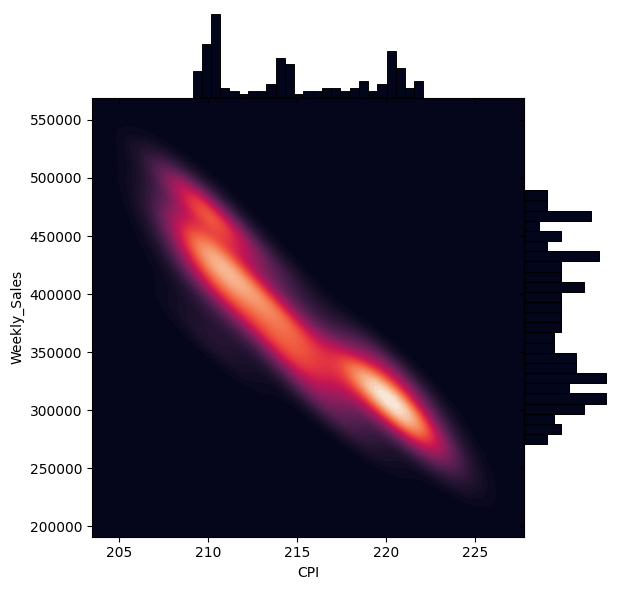

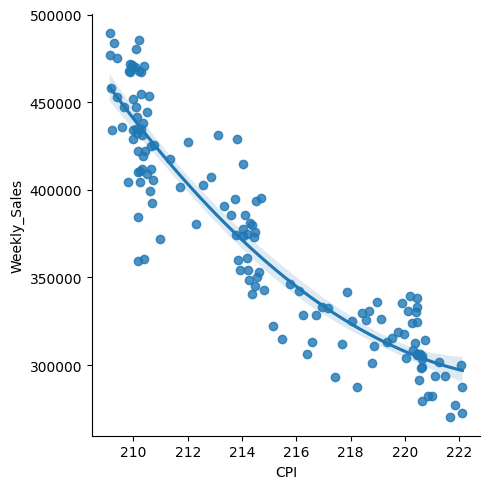

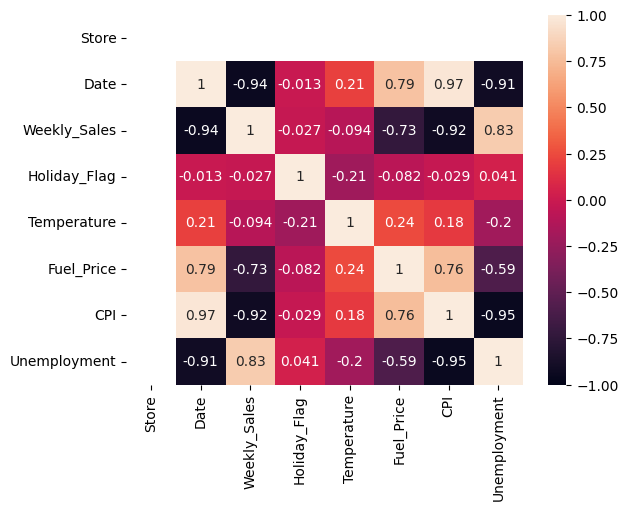

In [25]:
g = sns.JointGrid(data=Store36_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
plt.show()

heatmap = sns.heatmap(Store36_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Below, we have charts referencing the Walmart dataframe. The first thing that stands out is that there is a pit in the middle of the density table below, ranging between 140 and ranging between 180 and 200.

We broke up the data into two charts proceeding after the density chart. These two charts compare below 150, and above 180. As the CPI moves more inward toward the pit, the weekly CPI curves up, and as it expands outward, it flattens out. 

We believe that as the CPI approaches these to instances, it becomes more favorable for sales to occur.

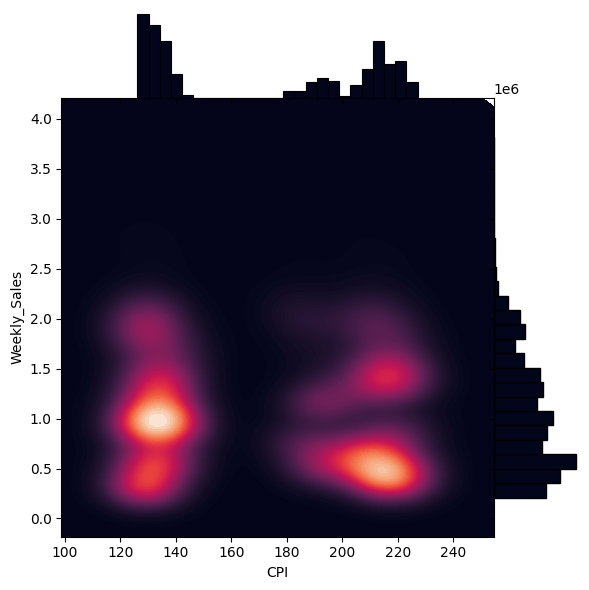

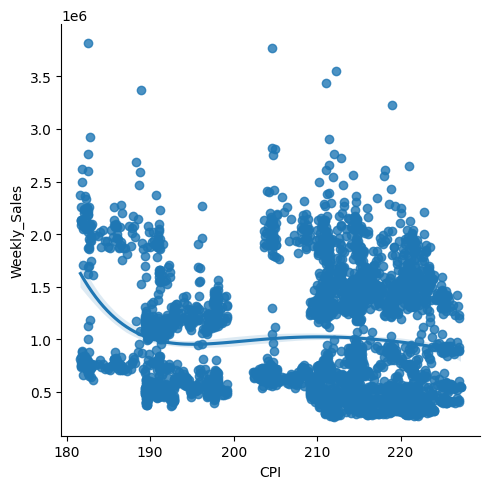

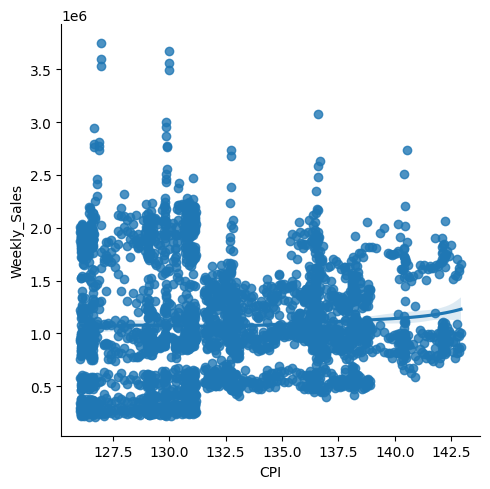

In [26]:
g = sns.JointGrid(data=walmart_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

sns.lmplot(x='CPI', y='Weekly_Sales', data=walmart_df[walmart_df["CPI"] > 180], ci=90, order=5)
plt.show()
sns.lmplot(x='CPI', y='Weekly_Sales', data=walmart_df[walmart_df["CPI"] < 150], ci=90, order=5)
plt.show()

When observing this, there is a more obvious pattern overall between all stores. As the CPI approaches the midpoint of the graph, around 160, the bottom line increase.

As you travel further outward from 160 CPI, the ranges begin to increase, but the bottom line lowers.

Finally, The likelihood CPI correlates to weekly sales and relates to the weekly sales amounts occuring. Stores with larger sales tend to have less aggressive slopes and curves.
This could be because the store is placed in an area with high density, and lots of demand while stores in low dense areas have may have varying demand depending on the conditions.

This might explain why the gas prices would correlate so strongly with weekly sales and fuel prices, especially since if a store is placed in an area of low density, then people would have to travel further to shop there. 